In [1]:
%matplotlib inline

/home/cp983411/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')



Example of hemodynamic reponse functions.
=========================================
We consider the hrf model in SPM together with the hrf shape proposed by
G.Glover, as well as their time and dispersion derivatives.

Requires matplotlib

Author : Bertrand Thirion: 2009-2015



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nistats import hemodynamic_models

A first step: looking at our data
----------------------------------

Let's quickly plot this file:



In [7]:
frame_times = np.linspace(0, 30, 61)
onset, amplitude, duration = 0., 1., 1.
stim = np.zeros_like(frame_times)
stim[(frame_times > onset) * (frame_times <= onset + duration)] = amplitude
exp_condition = np.array((onset, duration, amplitude)).reshape(3, 1)
hrf_models = ['spm', 'glover + derivative', 'glover + derivative + dispersion']

sample the hrf



In [8]:
exp_condition

array([[ 0.],
       [ 1.],
       [ 1.]])

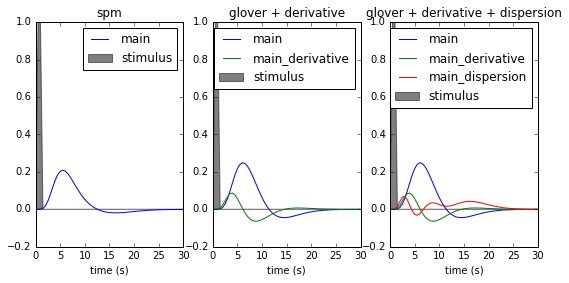

In [10]:
fig = plt.figure(figsize=(9, 4))
for i, hrf_model in enumerate(hrf_models):
    signal, name = hemodynamic_models.compute_regressor(
        exp_condition, hrf_model, frame_times, con_id='main',
        oversampling=16)

    plt.subplot(1, 3, i + 1)
    plt.fill(frame_times, stim, 'k', alpha=.5, label='stimulus')
    for j in range(signal.shape[1]):
        plt.plot(frame_times, signal.T[j], label=name[j])
    plt.xlabel('time (s)')
    plt.legend(loc=1)
    plt.title(hrf_model)

plt.subplots_adjust(bottom=.12)
plt.show()